In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
colored_Image =Image.open('/content/drive/MyDrive/Lenna.jpeg')

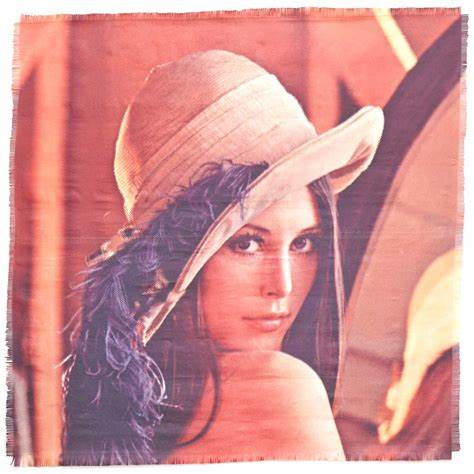

In [ ]:
display(colored_Image)

In [ ]:
print(f"The mode of the image is",colored_Image.mode);
print(f"THe size of the image is",colored_Image.size);

The mode of the image is RGB
THe size of the image is (474, 474)


In [ ]:
import numpy as np
from PIL import Image

image_array = np.zeros((100, 100, 3), dtype=np.uint8)
image_from_array = Image.fromarray(image_array)
image_from_array.show()



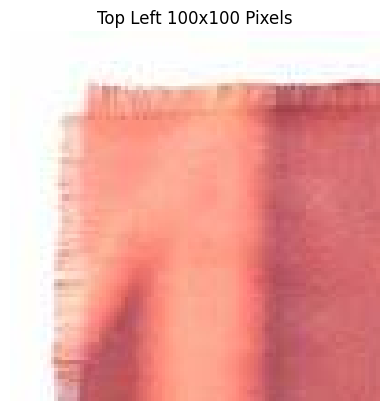

In [ ]:
# Display the top left 100x100 pixels
image_array = np.array(colored_Image)
top_left = image_array[:100, :100]
plt.imshow(top_left)
plt.title('Top Left 100x100 Pixels')
plt.axis('off')
plt.show()


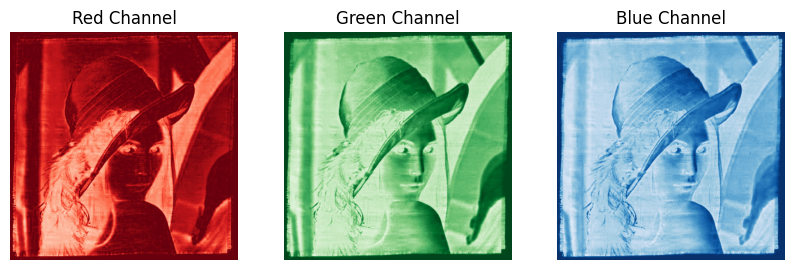

In [ ]:
# Show the three color channels (R, G, B)
red = image_array[:, :, 0]
green = image_array[:, :, 1]
blue = image_array[:, :, 2]

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(red, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')
plt.show()


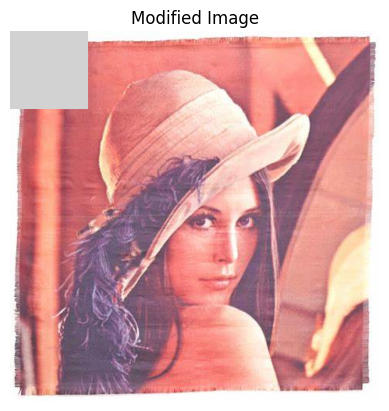

In [ ]:
# Modify the top 100x100 pixels to a light gray color
modified_image = image_array.copy()
modified_image[:100, :100] = 210
plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')
plt.show()

Exercise 2

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 511.5, 511.5, -0.5)

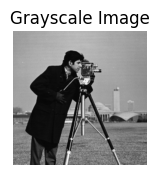

In [ ]:
# 1. Load and display a grayscale image.
image = Image.open("/content/drive/MyDrive/cameraman.png").convert("L")  # Convert to grayscale
plt.figure(figsize=(10, 5))
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

(-0.5, 149.5, 511.5, -0.5)

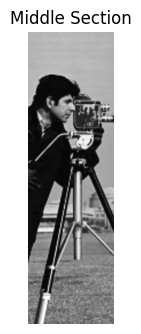

In [ ]:
# 2. Extract and display the middle section of the image (150 pixels)
image_array = np.array(image)
center = image_array.shape[1] // 2  # Find center column
half_width = 75  # 150 pixels total width
cropped_section = image_array[:, center - half_width:center + half_width]
plt.subplot(1, 5, 2)
plt.imshow(cropped_section, cmap='gray')
plt.title("Middle Section")
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

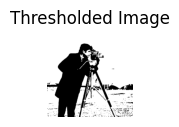

In [ ]:
# 3. Apply a simple threshold to the image
thresholded_image = np.where(image_array < 100, 0, 255).astype(np.uint8)
plt.subplot(1, 5, 3)
plt.imshow(thresholded_image, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

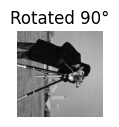

In [ ]:
# 4. Rotate the image 90 degrees clockwise
rotated_image = image.rotate(-90, expand=True)
plt.subplot(1, 5, 4)
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated 90°")
plt.axis("off")

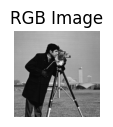

In [ ]:
# 5. Convert the grayscale image to an RGB image
rgb_image = Image.merge("RGB", (image, image, image))
plt.subplot(1, 5, 5)
plt.imshow(rgb_image)
plt.title("RGB Image")
plt.axis("off")

plt.show()


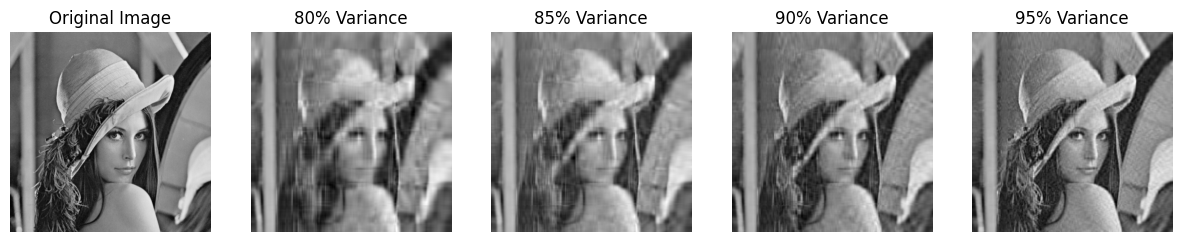

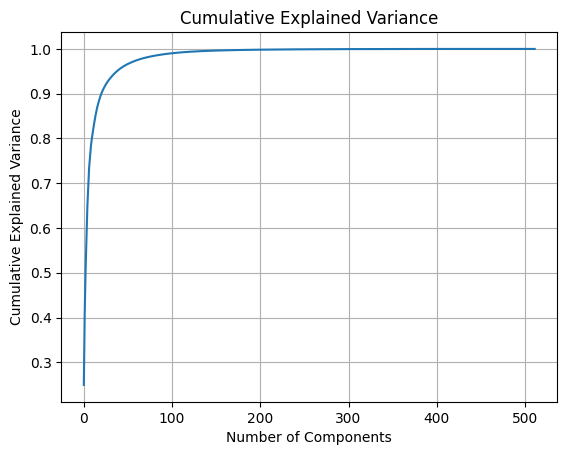

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_and_prepare_image(image_path):
    # Load image and convert to grayscale
    image = Image.open(image_path).convert('L')
    image_array = np.array(image) / 255.0
    return image_array

def standardize_data(data):
    mean = np.mean(data, axis=0)
    standardized_data = data - mean
    return standardized_data, mean

def compute_covariance_matrix(data):
    covariance_matrix = np.cov(data, rowvar=False)
    return covariance_matrix

def eigen_decomposition(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # Use eigh for symmetric matrices
    return eigenvalues, eigenvectors

def select_principal_components(eigenvalues, eigenvectors, explained_variance):
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    cumulative_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
    k = np.searchsorted(cumulative_variance, explained_variance) + 1
    return sorted_eigenvectors[:, :k], cumulative_variance, sorted_eigenvalues

def reconstruct_image(data, eigenvectors, mean):
    transformed_data = np.dot(data, eigenvectors)
    reconstructed_data = np.dot(transformed_data, eigenvectors.T) + mean
    return np.real(reconstructed_data)  # Ensure the reconstructed data is real

# Load and prepare image
image_path = '/content/Lenna_(test_image).png'
image_array = load_and_prepare_image(image_path)

# Standardize data
standardized_data, mean = standardize_data(image_array)

# Compute covariance matrix
cov_matrix = compute_covariance_matrix(standardized_data)

# Eigen decomposition
eigenvalues, eigenvectors = eigen_decomposition(cov_matrix)

# Select principal components and plot cumulative variance
explained_variance_list = [0.80, 0.85, 0.90, 0.95]
principal_components_list = []
cumulative_variance_list = []

for explained_variance in explained_variance_list:
    principal_components, cumulative_variance, sorted_eigenvalues = select_principal_components(eigenvalues, eigenvectors, explained_variance)
    principal_components_list.append(principal_components)
    cumulative_variance_list.append(cumulative_variance)

# Display original and reconstructed images
plt.figure(figsize=(15, 6))

# Show the original image
plt.subplot(1, len(explained_variance_list) + 1, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Show reconstructed images with different explained variance values
for i, (principal_components, explained_variance) in enumerate(zip(principal_components_list, explained_variance_list)):
    reconstructed_image = reconstruct_image(standardized_data, principal_components, mean)
    plt.subplot(1, len(explained_variance_list) + 1, i + 2)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'{explained_variance * 100:.0f}% Variance')
    plt.axis('off')

# Show all plots
plt.show()

# Plot cumulative variance
plt.figure()
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


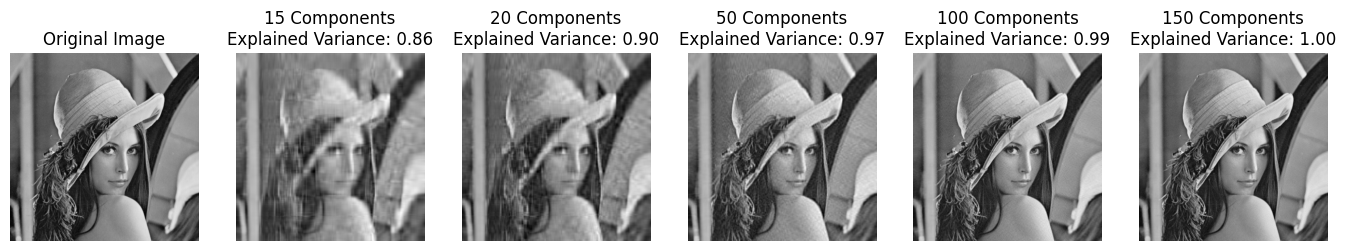

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

def apply_pca(image, components):
    # Convert image to grayscale and normalize
    gray = np.array(image.convert('L')) / 255.0
    mean = np.mean(gray, axis=0)
    centered = gray - mean

    # Apply PCA
    pca = PCA(n_components=components)
    transformed = pca.fit_transform(centered)
    reconstructed = pca.inverse_transform(transformed) + mean

    return reconstructed, pca

# Load the image
image_path = '/content/Lenna_(test_image).png'
image = Image.open(image_path)

# List of components for PCA compression
components_list = [15, 20, 50, 100, 150]

# Display original and compressed images
plt.figure(figsize=(17, 6))

# Show the original image
plt.subplot(1, len(components_list) + 1, 1)
plt.imshow(np.array(image.convert('L')), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Show compressed images with different PCA components and explained variance
for i, comp in enumerate(components_list):
    compressed, pca = apply_pca(image, comp)
    plt.subplot(1, len(components_list) + 1, i + 2)
    plt.imshow(compressed, cmap='gray')
    plt.title(f'{comp} Components\nExplained Variance: {sum(pca.explained_variance_ratio_):.2f}')
    plt.axis('off')

# Show all plots
plt.show()
